In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
df=pd.read_json("results.json")

In [2]:
print(df.head())

                                   uuid  \
0  f3e6a659-e2db-4b42-8c62-86ce70e7573e   
1  ab4f92a7-af68-48ea-b66a-2bf23526c0cd   
2  86b0263a-7de5-4266-984f-6365ea384b1b   
3  b8999a6a-5280-40f8-b4f5-b30a70b2d5fd   
4  c30fd024-4f3e-4e7e-85fb-786aa7a231ed   

                                                Name  \
0  1st Construction Branch of Weihai Construction...   
1  2nd Construction Branch of Weihai Construction...   
2  3rd Construction Branch of Weihai Construction...   
3  4th Construction Branch of Weihai Construction...   
4  5th Construction Branch of Weihai Construction...   

                                             Address Sanction Type  \
0  3rd Floor, No.271-1 East Kaiyuan Road, Weihai2...      Debarred   
1  4th Floor, No.271-1 Eastern Kaiyuan Road, Cao ...      Debarred   
2                 No.38 North Qingdao Road, Weihai38      Debarred   
3      4th Floor, No.21-2 Hong Kong Road, Weihai21-2      Debarred   
4                 No.44 East Culture Road, Weihai-44  

In [4]:
## checking for missimg values in the table 
print("Misiing values:")
print(df.isnull().sum())

Misiing values:
uuid             0
Name             0
Address          0
Sanction Type    0
Nationality      0
Effect Date      0
Lapse Date       0
Grounds          0
Entity Type      0
dtype: int64


In [6]:
print("Data Types:")
print(df.dtypes)

Data Types:
uuid             object
Name             object
Address          object
Sanction Type    object
Nationality      object
Effect Date      object
Lapse Date       object
Grounds          object
Entity Type      object
dtype: object


In [7]:
##Statistical Summary
print(df.describe())

                                        uuid                   Name Address  \
count                                    999                    999     999   
unique                                   999                    995     876   
top     70712614-7f65-4da9-aa56-206f79e36809  Gunathilake, Indralal           
freq                                       1                      2      10   

       Sanction Type                 Nationality  Effect Date  \
count            999                         999          999   
unique             2                          92          275   
top         Debarred  People's Republic of China  22/Jul/2024   
freq             771                         370          222   

                  Lapse Date              Grounds Entity Type  
count                    999                  999         999  
unique                   151                   47           3  
top     Until Further Notice  Cross-Debarment: WB         ORG  
freq                  

In [8]:
##Data Cleaning 
df.drop_duplicates(inplace=True)

In [10]:
# Handle non-date values by coercing errors to NaT
df['Effect Date'] = pd.to_datetime(df['Effect Date'], errors='coerce')
df['Lapse Date'] = pd.to_datetime(df['Lapse Date'], errors='coerce')

# Calculate duration, handling NaT values
df['Duration'] = (df['Lapse Date'] - df['Effect Date']).dt.days

# Fill missing durations with a placeholder, e.g., -1, or keep them as NaN
df['Duration'].fillna(-1, inplace=True)


C:\Users\91638\AppData\Local\Temp\ipykernel_4176\4120573348.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(-1, inplace=True)


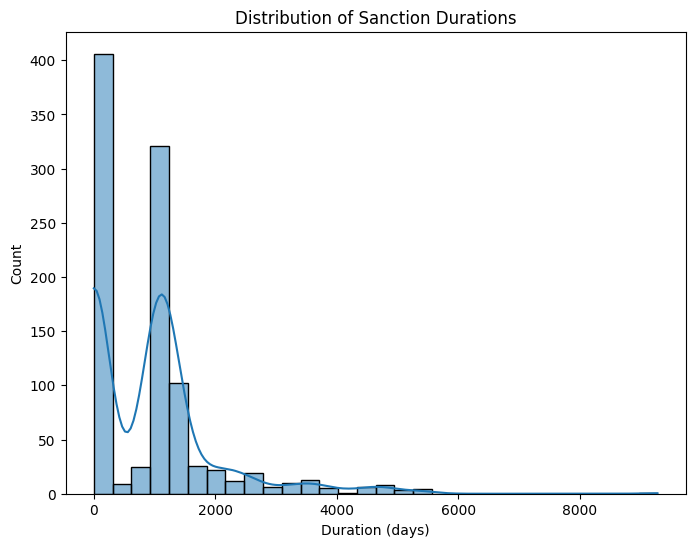

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Sanction Durations')
plt.xlabel('Duration (days)')
plt.show()

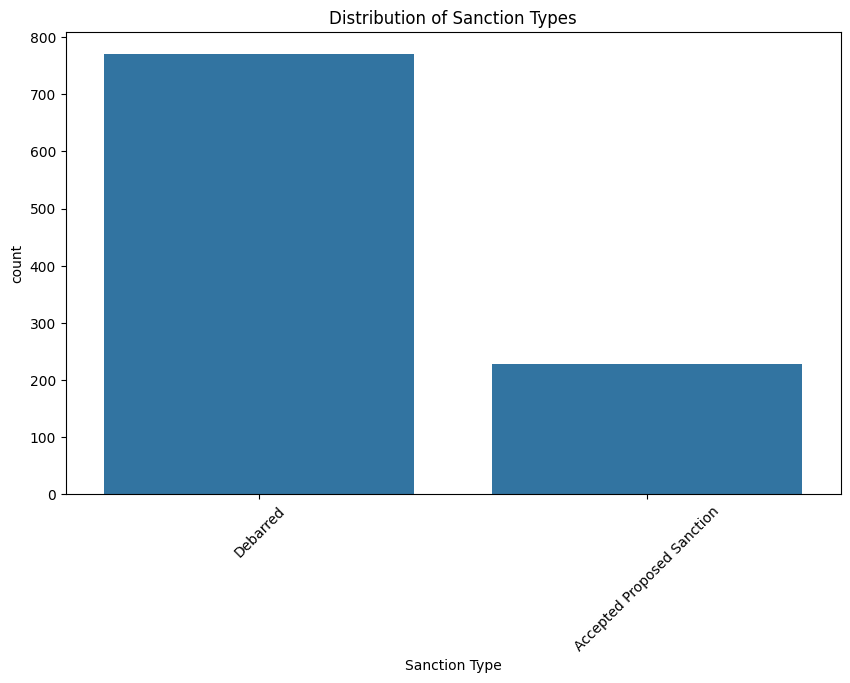

In [12]:
# Visualization: Distribution of Sanction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sanction Type', order=df['Sanction Type'].value_counts().index)
plt.title('Distribution of Sanction Types')
plt.xticks(rotation=45)
plt.show()

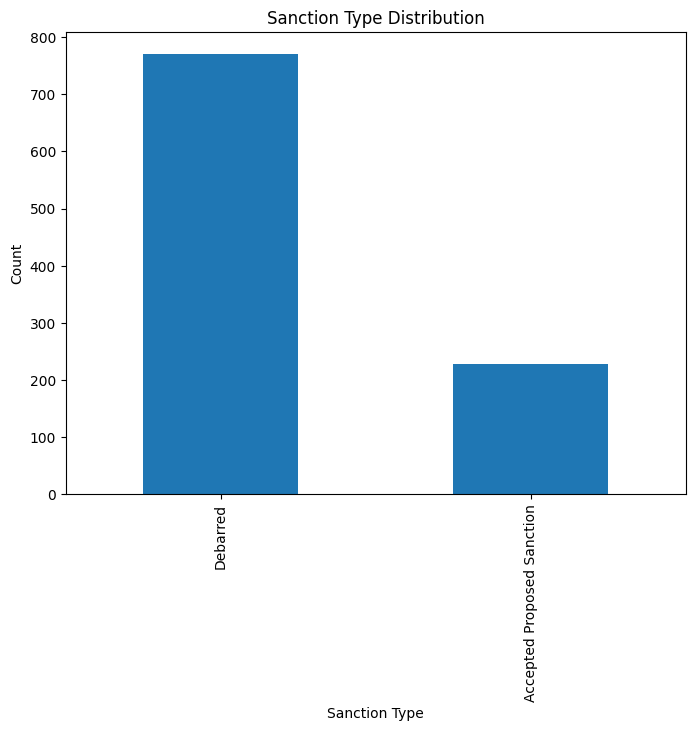

In [13]:
#Bar Plot for categorical data
df['Sanction Type'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Sanction Type Distribution')
plt.xlabel('Sanction Type')
plt.ylabel('Count')
plt.show()


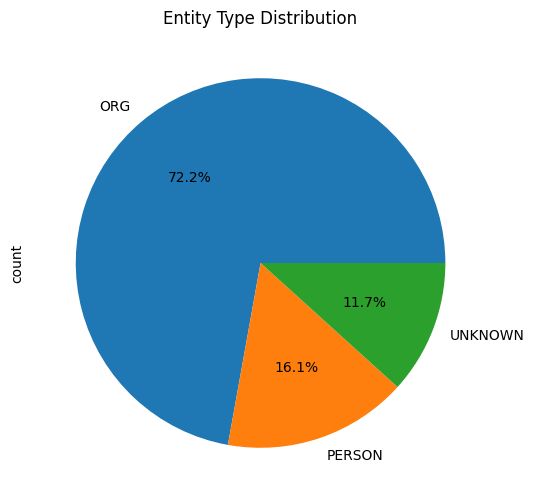

In [14]:
#Pie Chart for entity type 
df['Entity Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
plt.title('Entity Type Distribution')
plt.show()


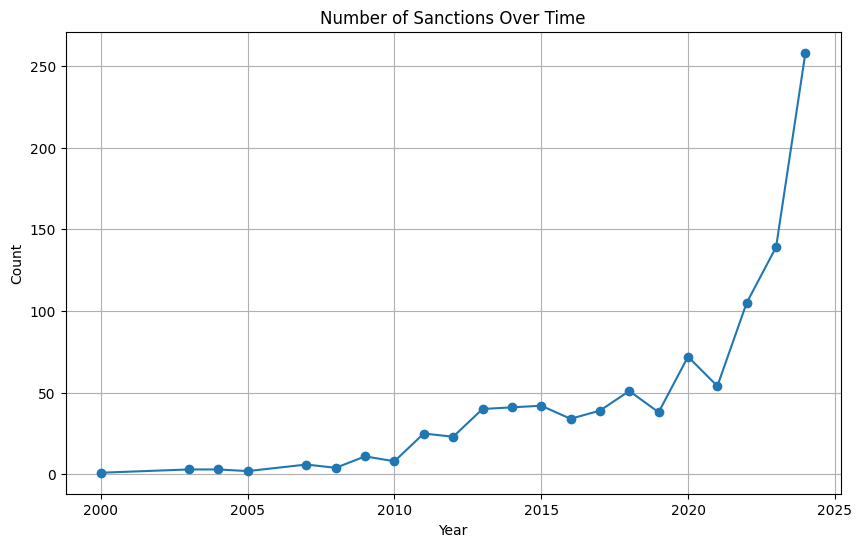

In [16]:
#To group sanctions by according to the respective years to observe the trends 
df['Year'] = df['Effect Date'].dt.year
sanctions_per_year = df.groupby('Year').size()

sanctions_per_year.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Number of Sanctions Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()


In [17]:
##Performing K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data
features = df[['Duration', 'Sanction Type', 'Nationality']]
features = pd.get_dummies(features, columns=['Sanction Type', 'Nationality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [21]:
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


           Duration         Year  Cluster
Cluster                                  
0        633.775510  2018.387755      0.0
1        930.953961  2019.722698      1.0
2        309.312500  2022.312500      2.0


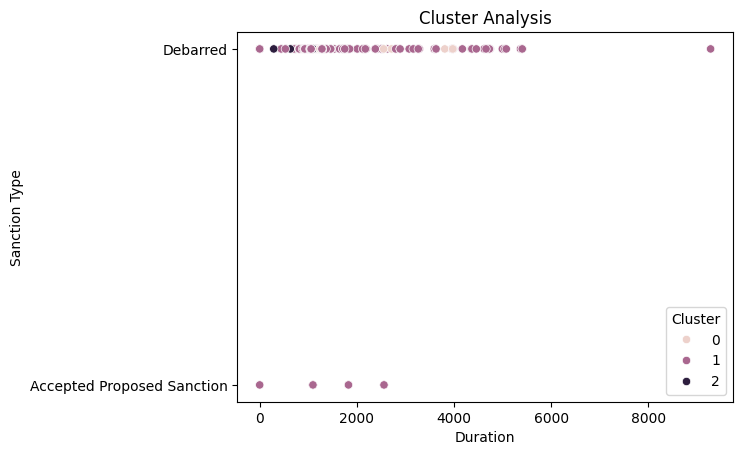

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Duration', y='Sanction Type', hue='Cluster', data=df)
plt.title("Cluster Analysis")
plt.show()
